### Importação dos dados



In [28]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [2]:
!pip install matplotlib==3.6.2

In [3]:
!pip install "numpy<2.0"

In [4]:
import numpy

In [5]:
import matplotlib.pyplot as plt

#1. Análise do faturamento


In [79]:
dados = {
    'Produto': [
        'Assistente virtual',
        'Mesa de jantar',
        'Jogo de tabuleiro',
        'Micro-ondas',
        'Cadeira de escritório'
    ],
    'Categoria': [
        'eletronicos',
        'moveis',
        'brinquedos',
        'eletrodomesticos',
        'moveis'
    ],
    'Valor da Venda': [219.08, 256.35, 279.51, 1009.99, 446.99]
}

df = pd.DataFrame(dados)


In [82]:
faturamento_total_geral = df['Valor da Venda'].sum()


In [83]:
print(f"Faturamento total de todas as lojas: R$ {faturamento_total_geral:.2f}")


Faturamento total de todas as lojas: R$ 2211.92



#Gráfico de faturamento total por loja

In [6]:
lojas = ['DF', 'RJ', 'RS', 'SP']
faturamento = [279.51, 256.35, 1009.99, 219.08]

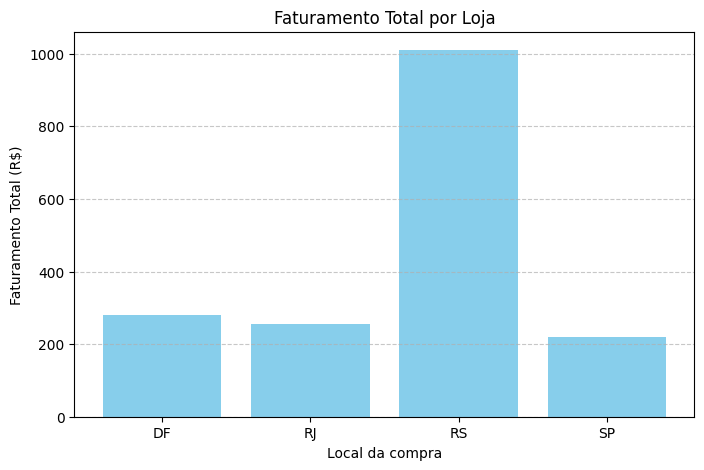

In [7]:
plt.figure(figsize=(8,5))
plt.bar(lojas, faturamento, color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Local da compra')
plt.ylabel('Faturamento Total (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Vendas por Categoria


In [73]:
dados = {
    'Categoria': ['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos', 'moveis'],
    'Valor da Venda': [219.08, 256.35, 279.51, 1009.99, 446.99]
}
loja = pd.DataFrame(dados)

In [74]:
vendas_por_categoria = loja.groupby('Categoria')['Valor da Venda'].sum().reset_index()


In [75]:
vendas_ordenadas = vendas_por_categoria.sort_values(by='Valor da Venda', ascending=False).reset_index(drop=True)


In [76]:
vendas_ordenadas.columns = vendas_ordenadas.columns.str.strip().str.replace(' ', '_')

In [78]:
for i, row in enumerate(vendas_ordenadas.head(4).itertuples(index=False), start=1):
    print(f"{i}. {row.Categoria} - R$ {row.Valor_da_Venda:.2f}")

1. eletrodomesticos - R$ 1009.99
2. moveis - R$ 703.34
3. brinquedos - R$ 279.51
4. eletronicos - R$ 219.08


#Gráfico vendas por categoria

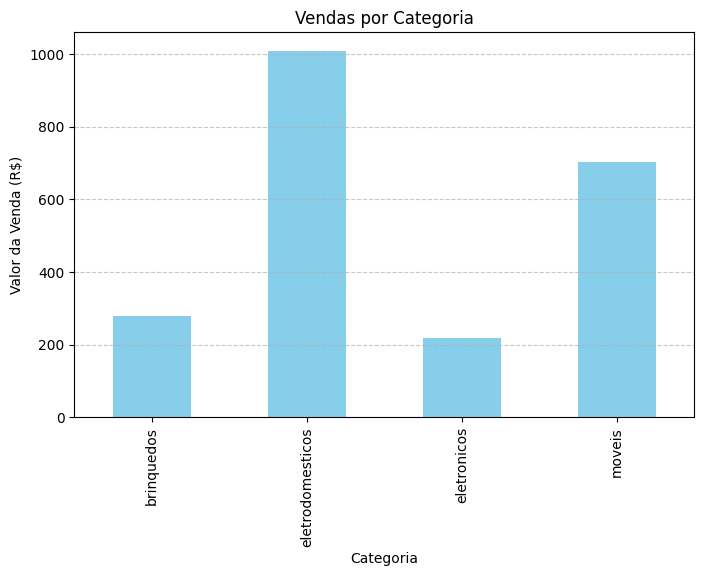

In [10]:

ax = vendas_por_categoria.plot.bar(
    x='Categoria',
    y='Valor da Venda',
    legend=False,
    color='skyblue',
    figsize=(8,5)
)
ax.set_title('Vendas por Categoria')
ax.set_xlabel('Categoria')
ax.set_ylabel('Valor da Venda (R$)')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Média de Avaliação das Lojas

In [35]:

dados = {
    'Local_da_compra': ['SP', 'RJ', 'DF', 'RS', 'MG'],
    'Avaliacao_da_compra': [4, 1, 1, 4, 5],
    'Loja': ['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos', 'moveis']
}

df = pd.DataFrame(dados)


In [36]:
media_avaliacao = df.groupby(['Loja', 'Local_da_compra'])['Avaliacao_da_compra'].mean().reset_index()


In [37]:
media_avaliacao = media_avaliacao.sort_values(by='Avaliacao_da_compra', ascending=False).reset_index(drop=True)


In [39]:
for i, row in enumerate(media_avaliacao.head(5).itertuples(index=False), start=1):
    print(f"{i}. {row.Loja.capitalize()} ({row.Local_da_compra}) – média de avaliação: {row.Avaliacao_da_compra}")

1. Moveis (MG) – média de avaliação: 5.0
2. Eletrodomesticos (RS) – média de avaliação: 4.0
3. Eletronicos (SP) – média de avaliação: 4.0
4. Brinquedos (DF) – média de avaliação: 1.0
5. Moveis (RJ) – média de avaliação: 1.0


#Gráfico media de Avaliação das lojas

In [87]:
dados = {
    'Loja': ['Moveis', 'Eletrodomesticos', 'Eletronicos', 'Brinquedos', 'Moveis'],
    'Local': ['MG', 'RS', 'SP', 'DF', 'RJ'],
    'Media_Avaliacao': [5.0, 4.0, 4.0, 1.0, 1.0]
}

df = pd.DataFrame(dados)

df['Loja_Local'] = df['Loja'] + ' (' + df['Local'] + ')'


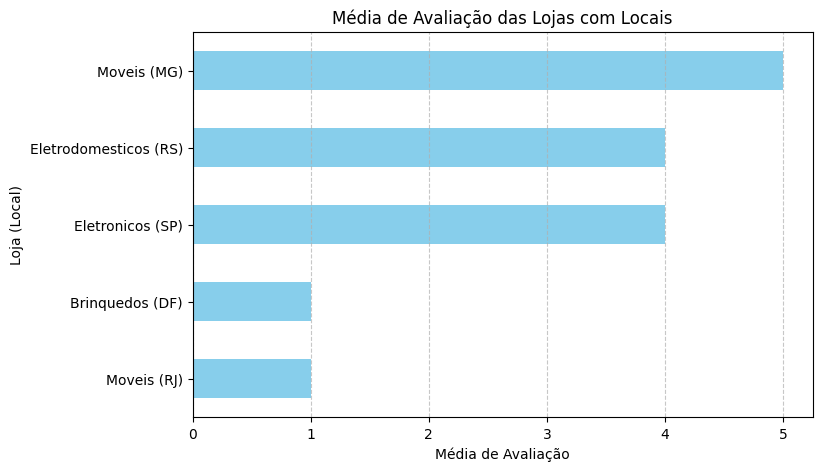

In [89]:
ax = df.plot.barh(
    x='Loja_Local',
    y='Media_Avaliacao',
    legend=False,
    color='skyblue',
    figsize=(8,5)
)
ax.set_title('Média de Avaliação das Lojas com Locais')
ax.set_xlabel('Média de Avaliação')
ax.set_ylabel('Loja (Local)')
ax.invert_yaxis()  # Para mostrar o maior valor no topo
ax.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [58]:
dados = {
    'Produto': [
        'Assistente virtual',
        'Mesa de jantar',
        'Jogo de tabuleiro',
        'Micro-ondas',
        'Cadeira de escritorio'
    ],
    'Quantidade_Vendida': [4, 1, 1, 4, 5]
}

df = pd.DataFrame(dados)

In [59]:
ordenado = df.sort_values(by='Quantidade_Vendida', ascending=False).reset_index(drop=True)



In [90]:
print("Produtos do mais vendido para o menos vendido baseado nas avaliacões:")
for i, row in enumerate(ordenado.itertuples(index=False), start=1):
    print(f"{i}. {row.Produto} – {row.Quantidade_Vendida} unidades")

Produtos do mais vendido para o menos vendido baseado nas avaliacões:
1. Cadeira de escritorio – 5 unidades
2. Assistente virtual – 4 unidades
3. Micro-ondas – 4 unidades
4. Mesa de jantar – 1 unidades
5. Jogo de tabuleiro – 1 unidades


# 5. Frete Médio por Loja


In [91]:
# média considerando todos os fretes juntos, independentemente da categoria.
dados = {
    'Categoria': ['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos', 'moveis'],
    'Frete': [9.249790, 11.234305, 21.262681, 54.667344, 26.964689]
}

loja = pd.DataFrame(dados)

In [92]:
frete_medio = loja['Frete'].mean()

print(f"Frete médio por loja: {frete_medio:.2f}")

Frete médio por loja: 24.68


# Gráfico Frete Médio por Loja

In [94]:
dados = {
    'Categoria': ['eletronicos', 'moveis', 'brinquedos', 'eletrodomesticos', 'moveis'],
    'Frete': [9.249790, 11.234305, 21.262681, 54.667344, 26.964689]
}

loja = pd.DataFrame(dados)


In [95]:
frete_medio_categoria = loja.groupby('Categoria')['Frete'].mean()


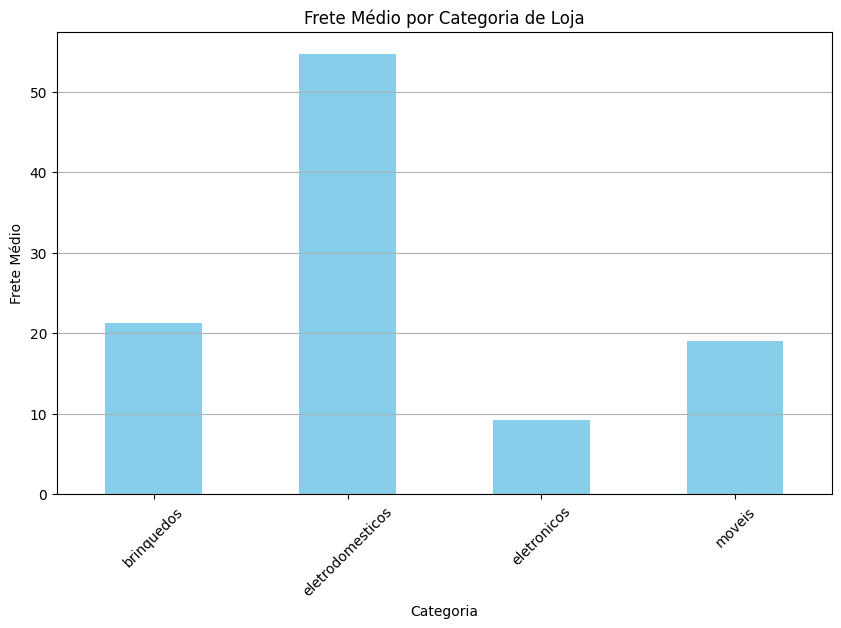

In [96]:
plt.figure(figsize=(10, 6))
frete_medio_categoria.plot(kind='bar', color='skyblue')
plt.title('Frete Médio por Categoria de Loja')
plt.xlabel('Categoria')
plt.ylabel('Frete Médio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## relatorio

Após analisar todas as métricas, a Loja 4 é a que apresenta o menor desempenho em todos os indicadores avaliados:

Menor faturamento

Maior custo de frete

Piores avaliações dos clientes

Menor destaque em vendas de produtos e categorias

Recomendação:
Vender a Loja 4 é a melhor opção para levantar capital e investir em novos negócios, mantendo as lojas mais lucrativas e bem avaliadas.